# Credit card challenge - Description
# Part 2: analyse clusters

- You are given a dataset of credit card transactions. The dataset contains 8500 customers and their activity over a 6-month period. Each transaction is characterized by 18 features

- Your task is to find the most useful customer segmentation to improve the marketing campaigns of the company.

# Read dataset

In [36]:
# import librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
import collections
from pylab import rcParams
rcParams['figure.figsize'] = 12, 10
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
def normal_distribution(X0):
    # import librairy
    from scipy.stats import norm
    
    # Fit a normal distribution to the data:
    mu, std = norm.fit(X0)

    # Plot the histogram.
    plt.hist(X0, bins=25, density=True, alpha=0.6, color='g')
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

In [10]:
card_labelled = pd.read_csv('card_withcluster.csv',index_col=0)
#attribute = attribute.drop('Unnamed: 0', axis=1)
#attribute = attribute.drop_duplicates()

In [11]:
card_labelled.head()

,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,hc_cluster,km_cluster
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571,0,3
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000,1,3
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000,1,1
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000,0,3
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000,1,1


# Hierarchichal clustering analysis

## Group by cluster (label) with the mean

In [12]:
c0_hc=card_labelled[card_labelled['hc_cluster']==0].mean()

In [13]:
c1_hc=card_labelled[card_labelled['hc_cluster']==1].mean()

In [14]:
c2_hc=card_labelled[card_labelled['hc_cluster']==2].mean()

In [15]:
c3_hc=card_labelled[card_labelled['hc_cluster']==3].mean()

In [16]:
hc_means=pd.DataFrame(c0_hc)

In [17]:
hc_means[1]=c1_hc
hc_means[2]=c2_hc
hc_means[3]=c3_hc

In [18]:
hc_means

,0,1,2,3
balance_account,1245.646821,1079.966171,4549.988935,4812.382778
purchases_amount,1758.884735,296.901650,540.175025,27505.339565
paid_advance,301.445087,725.552536,4296.787539,1617.786145
full_purchases,941.039897,216.494397,335.806567,22417.452174
balance_frequency_update,0.960241,0.778876,0.969710,0.956126
installments,818.248041,80.689516,204.492252,5087.887391
purchases_frequency,0.859657,0.208853,0.305485,0.905072
full_purchases_frequency,0.341283,0.090472,0.145038,0.846377
purchases_installments_frequency,0.685849,0.118041,0.211251,0.708696
cash_advance_frequency,0.046681,0.126098,0.483297,0.061594


In [24]:
hc_means_T=hc_means.T
hc_means_T

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc,hc_cluster,km_cluster
0,1245.646821,1758.884735,301.445087,941.039897,0.960241,818.248041,0.859657,0.341283,0.685849,0.046681,0.954454,28.291607,4736.345277,11.727872,1843.406338,655.345555,0.275017,0.0,2.673160
1,1079.966171,296.901650,725.552536,216.494397,0.778876,80.689516,0.208853,0.090472,0.118041,0.126098,2.359920,3.703286,3410.046856,11.265864,961.893412,852.358720,0.071152,1.0,1.110860
2,4549.988935,540.175025,4296.787539,335.806567,0.969710,204.492252,0.305485,0.145038,0.211251,0.483297,14.869870,8.377377,7637.837838,11.765766,3716.752950,1611.121931,0.040995,2.0,0.281281
3,4812.382778,27505.339565,1617.786145,22417.452174,0.956126,5087.887391,0.905072,0.846377,0.708696,0.061594,2.608696,124.130435,16000.000000,11.913043,28138.984873,2599.090939,0.533432,3.0,2.000000


In [25]:
hc_means_T = hc_means_T.drop(['hc_cluster','km_cluster'], axis=1)

In [26]:
hc_means_T

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,1245.646821,1758.884735,301.445087,941.039897,0.960241,818.248041,0.859657,0.341283,0.685849,0.046681,0.954454,28.291607,4736.345277,11.727872,1843.406338,655.345555,0.275017
1,1079.966171,296.901650,725.552536,216.494397,0.778876,80.689516,0.208853,0.090472,0.118041,0.126098,2.359920,3.703286,3410.046856,11.265864,961.893412,852.358720,0.071152
2,4549.988935,540.175025,4296.787539,335.806567,0.969710,204.492252,0.305485,0.145038,0.211251,0.483297,14.869870,8.377377,7637.837838,11.765766,3716.752950,1611.121931,0.040995
3,4812.382778,27505.339565,1617.786145,22417.452174,0.956126,5087.887391,0.905072,0.846377,0.708696,0.061594,2.608696,124.130435,16000.000000,11.913043,28138.984873,2599.090939,0.533432


## Scaling the means

In [27]:
numeric_features = list(hc_means_T.columns)

In [28]:
numeric_features

['balance_account',
 'purchases_amount',
 'paid_advance',
 'full_purchases',
 'balance_frequency_update',
 'installments',
 'purchases_frequency',
 'full_purchases_frequency',
 'purchases_installments_frequency',
 'cash_advance_frequency',
 'nr_cash_advances',
 'nr_purchases',
 'credit_limit',
 'fixed_rate_period',
 'payments',
 'min_payments',
 'full_payment_prc']

In [56]:
hc_means_scaled=hc_means_T.loc[:,numeric_features].values

In [57]:
hc_means_scaled

array([[1.24564682e+03, 1.75888474e+03, 3.01445087e+02, 9.41039897e+02,
        9.60241367e-01, 8.18248041e+02, 8.59657256e-01, 3.41282741e-01,
        6.85848795e-01, 4.66812581e-02, 9.54454311e-01, 2.82916070e+01,
        4.73634528e+03, 1.17278717e+01, 1.84340634e+03, 6.55345555e+02,
        2.75016689e-01],
       [1.07996617e+03, 2.96901650e+02, 7.25552536e+02, 2.16494397e+02,
        7.78875913e-01, 8.06895159e+01, 2.08852781e-01, 9.04715616e-02,
        1.18040973e-01, 1.26097986e-01, 2.35991974e+00, 3.70328568e+00,
        3.41004686e+03, 1.12658641e+01, 9.61893412e+02, 8.52358720e+02,
        7.11520587e-02],
       [4.54998893e+03, 5.40175025e+02, 4.29678754e+03, 3.35806567e+02,
        9.69709583e-01, 2.04492252e+02, 3.05485119e-01, 1.45038227e-01,
        2.11250584e-01, 4.83296675e-01, 1.48698699e+01, 8.37737738e+00,
        7.63783784e+03, 1.17657658e+01, 3.71675295e+03, 1.61112193e+03,
        4.09953383e-02],
       [4.81238278e+03, 2.75053396e+04, 1.61778614e+03, 2.241

In [58]:
numeric_transformer = Pipeline(steps=[('onehot', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])

numeric_feat = list(range(len(numeric_features)))

featureencoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_feat)])

hc_means_scaled = featureencoder.fit_transform(hc_means_scaled)

In [59]:
hc_means_scaled=pd.DataFrame(hc_means_scaled)

In [60]:
hc_means_scaled.columns=numeric_features

In [61]:
hc_means_scaled

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,-0.951062,-0.499313,-0.923182,-0.530427,0.553783,-0.353677,0.920670,-0.048657,0.949431,-0.745854,-0.755198,-0.262971,-0.655731,0.246501,-0.604395,-1.013578,0.227889
1,-1.045060,-0.625905,-0.650139,-0.606732,-1.728720,-0.711221,-1.146236,-0.889737,-1.165578,-0.299606,-0.505090,-0.766787,-0.926688,-1.659993,-0.682494,-0.755628,-0.807568
2,0.923627,-0.604840,1.649037,-0.594167,0.672941,-0.651205,-0.839339,-0.706751,-0.818385,1.707518,1.721106,-0.671014,-0.062968,0.402872,-0.438422,0.237826,-0.960738
3,1.072494,1.730057,-0.075716,1.731326,0.501996,1.716103,1.064905,1.645145,1.034532,-0.662058,-0.460819,1.700772,1.645388,1.010620,1.725310,1.531380,1.540417


## Heatmap features vs labels

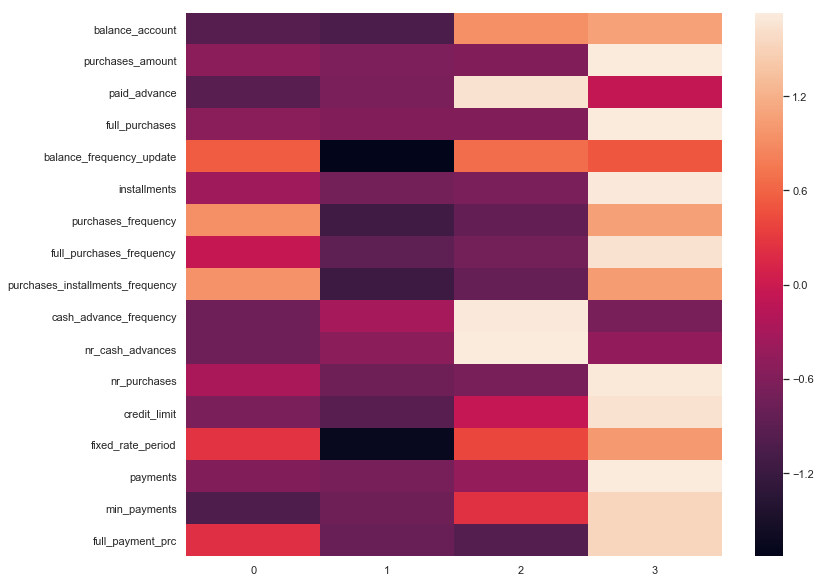

In [37]:
sns.heatmap(hc_means_scaled.T)

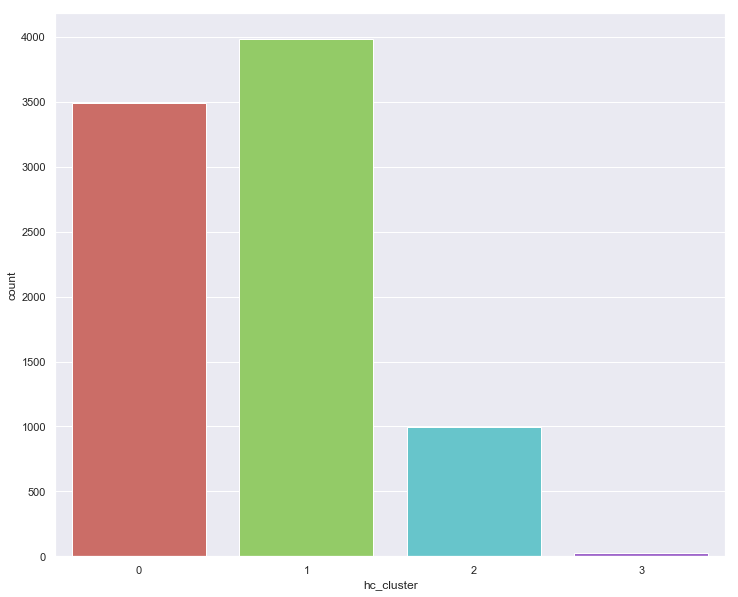

In [39]:
#count the number of customers of each cluster
sns.countplot(x='hc_cluster', data=card_labelled, palette='hls')
plt.show()

# K-means clustering Analyisis

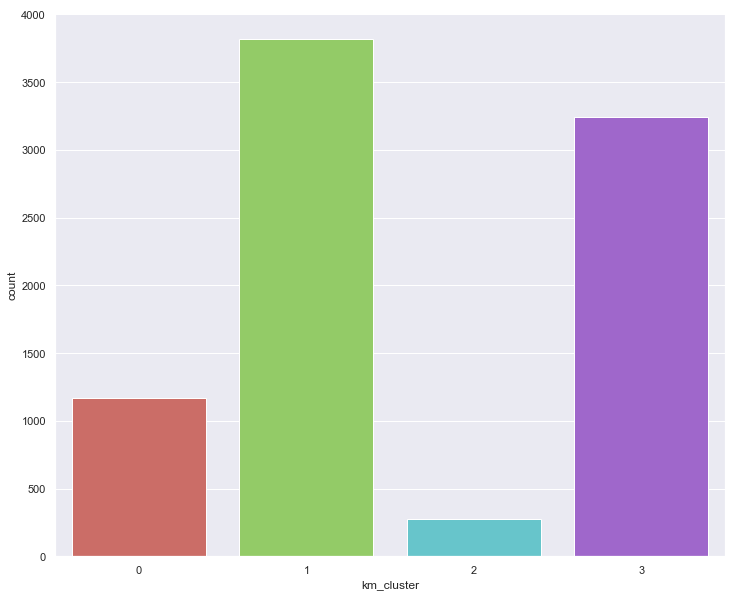

In [40]:
#count the number of customers of each cluster
sns.countplot(x='km_cluster', data=card_labelled, palette='hls')
plt.show()

## Group by cluster (label) with the mean

In [41]:
c0_km=card_labelled[card_labelled['km_cluster']==0].mean()
c1_km=card_labelled[card_labelled['km_cluster']==1].mean()
c2_km=card_labelled[card_labelled['km_cluster']==2].mean()
c3_km=card_labelled[card_labelled['km_cluster']==3].mean()

In [42]:
km_means=pd.DataFrame(c0_km)
km_means[1]=c1_km
km_means[2]=c2_km
km_means[3]=c3_km

In [44]:
km_means

,0,1,2,3
balance_account,4573.108363,984.951070,4023.187445,962.968370
purchases_amount,503.107725,269.973828,9109.809048,1355.349633
paid_advance,4427.094960,578.815053,763.087615,215.031763
full_purchases,322.615030,205.713391,6033.206667,676.005275
balance_frequency_update,0.968914,0.786007,0.984282,0.940339
installments,180.579966,64.538218,3078.800183,679.620062
purchases_frequency,0.285194,0.177883,0.944755,0.891889
full_purchases_frequency,0.138903,0.085997,0.732956,0.316632
purchases_installments_frequency,0.182652,0.087847,0.800000,0.717693
cash_advance_frequency,0.485902,0.110790,0.078416,0.042908


In [45]:
km_means_T = km_means.T.drop(['hc_cluster','km_cluster'], axis=1)

In [46]:
km_means_T

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,4573.108363,503.107725,4427.094960,322.615030,0.968914,180.579966,0.285194,0.138903,0.182652,0.485902,14.225751,7.704721,7488.330082,11.387124,3399.192957,2020.268463,0.034959
1,984.951070,269.973828,578.815053,205.713391,0.786007,64.538218,0.177883,0.085997,0.087847,0.110790,2.047096,2.998692,3262.994853,11.444008,965.399643,563.281696,0.081135
2,4023.187445,9109.809048,763.087615,6033.206667,0.984282,3078.800183,0.944755,0.732956,0.800000,0.078416,2.439560,100.575092,10429.487179,11.948718,8691.813429,2402.781595,0.287153
3,962.968370,1355.349633,215.031763,676.005275,0.940339,679.620062,0.891889,0.316632,0.717693,0.042908,0.800309,23.722531,4347.583411,11.611111,1422.207132,658.264530,0.267831


## Scaling the means

In [49]:
km_means_scaled=km_means_T.loc[:,numeric_features].values

In [50]:
numeric_transformer = Pipeline(steps=[('onehot', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])

numeric_feat = list(range(len(numeric_features)))

featureencoder = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_feat)])

km_means_scaled = featureencoder.fit_transform(km_means_scaled)

In [51]:
km_means_scaled=pd.DataFrame(km_means_scaled)

In [52]:
km_means_scaled.columns=numeric_features

In [53]:
km_means_scaled

,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,1.157525,-0.630209,1.720409,-0.608145,0.621505,-0.671424,-0.837421,-0.707521,-0.839507,1.716316,1.721261,-0.662084,0.394372,-0.962941,-0.071859,0.749763,-1.194981
1,-0.986649,-0.693910,-0.538348,-0.655962,-1.697097,-0.766404,-1.147579,-0.915800,-1.140529,-0.384906,-0.521315,-0.781712,-1.111961,-0.702866,-0.865156,-1.043638,-0.779500
2,0.828909,1.721465,-0.430189,1.727702,0.816315,1.700785,1.068900,1.631154,1.120688,-0.566254,-0.449047,1.698703,1.442895,1.604676,1.653274,1.220598,1.074166
3,-0.999785,-0.397345,-0.751872,-0.463595,0.259277,-0.262957,0.916100,-0.007834,0.859348,-0.765156,-0.750899,-0.254907,-0.725305,0.061131,-0.716259,-0.926724,0.900315


## Heatmap features vs labels

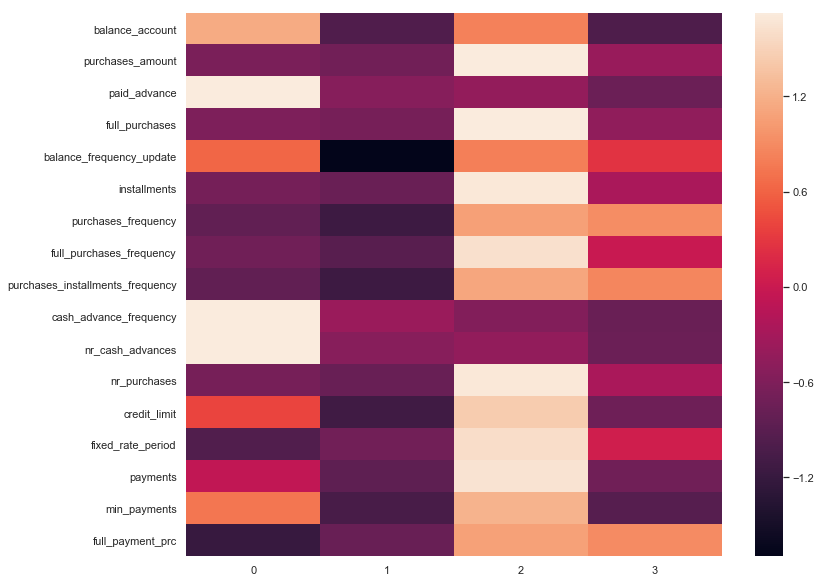

In [54]:
sns.heatmap(km_means_scaled.T)

# Focus on hierarchical clustering

In [65]:
card_labelled['hc_cluster'].value_counts()

1    3987
0    3491
2     999
3      23
Name: hc_cluster, dtype: int64

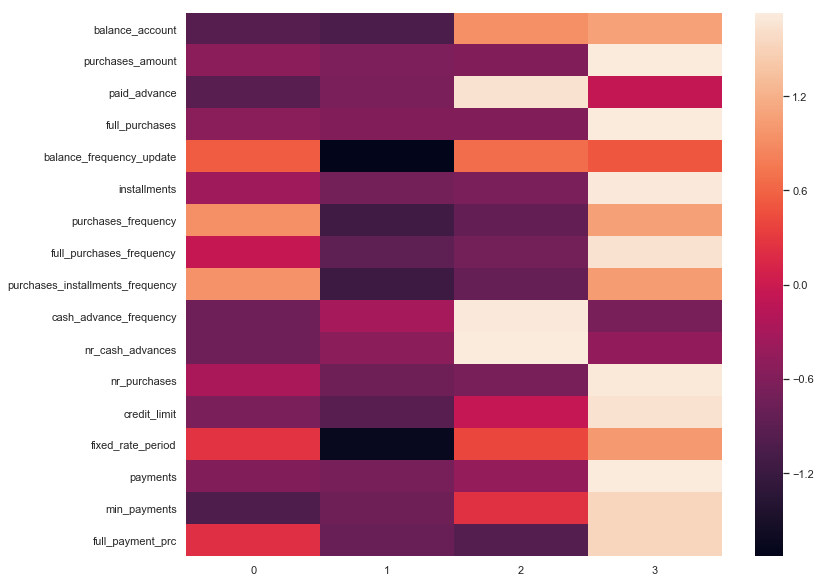

In [62]:
sns.heatmap(hc_means_scaled.T)

In [94]:
hc_means_ordered=hc_means_scaled[['balance_account','credit_limit','min_payments','payments','purchases_amount','full_purchases','installments','nr_purchases','full_payment_prc','full_purchases_frequency','purchases_installments_frequency','purchases_frequency','paid_advance','cash_advance_frequency','nr_cash_advances','fixed_rate_period','balance_frequency_update']]

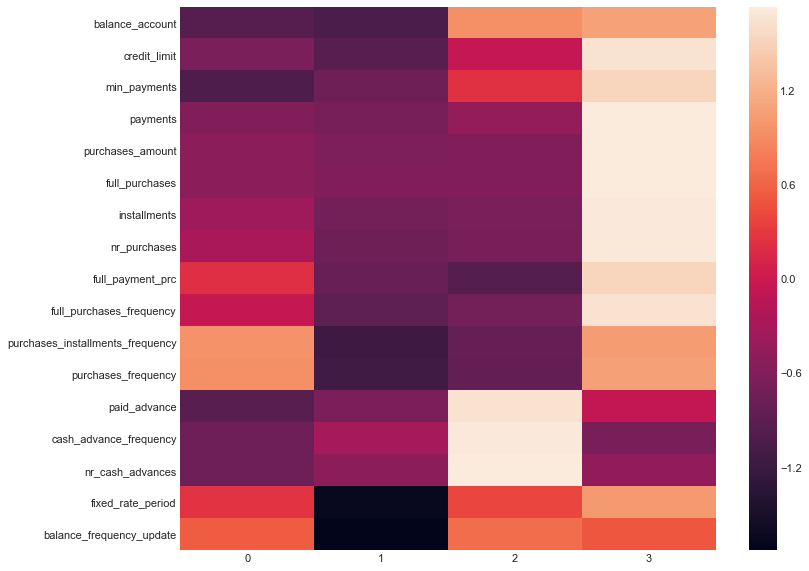

In [95]:
#sorted heatmap
sns.heatmap(hc_means_ordered.T)

In [102]:
hc_means_ordered2=hc_means_scaled[['balance_account','credit_limit','min_payments','full_purchases_frequency','cash_advance_frequency']]

## Sorted and reduced heatmap

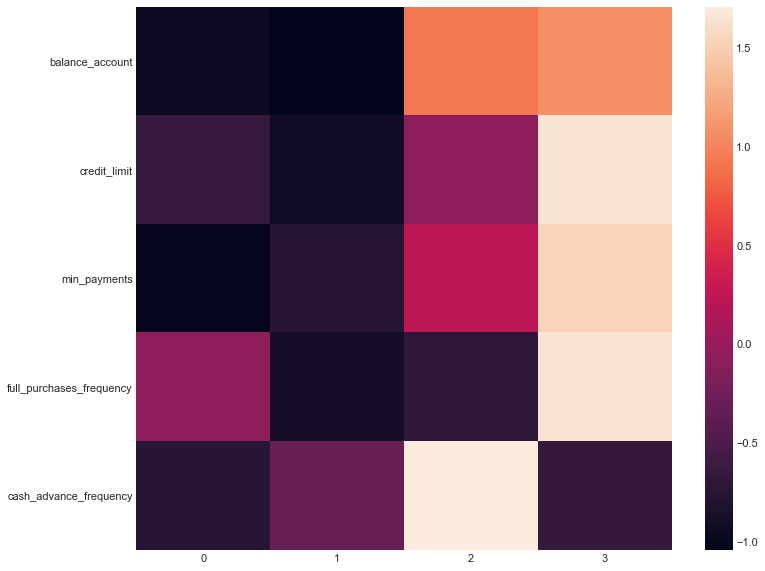

In [103]:
sns.heatmap(hc_means_ordered2.T)

## Analyse specific features

C:\Users\thiba\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\thiba\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


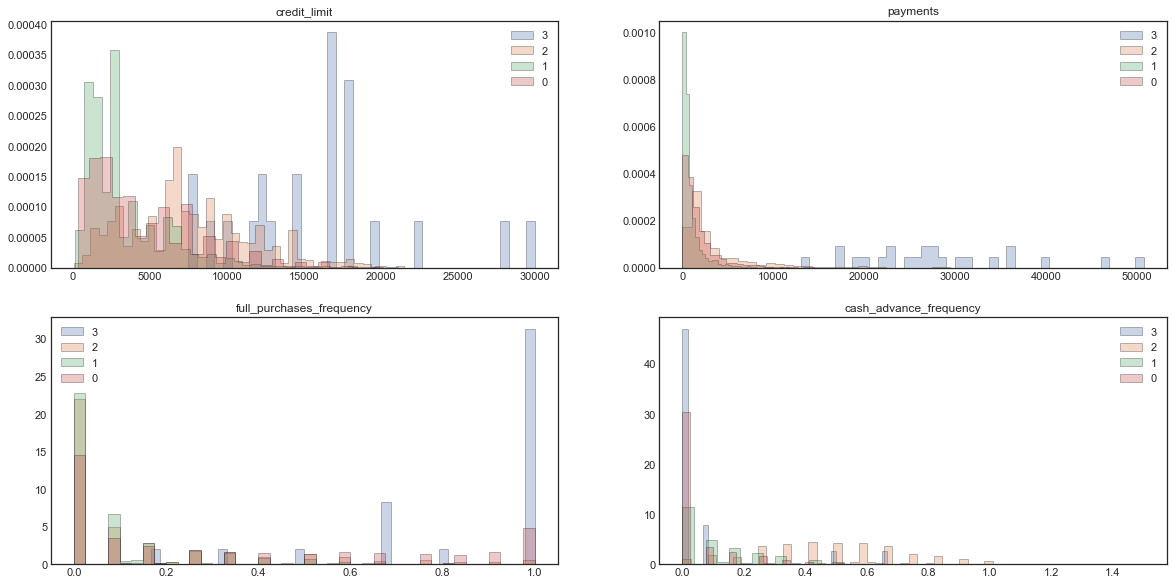

In [113]:
#f, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2)
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

x1 = card_labelled["credit_limit"][card_labelled["hc_cluster"]==3]
x2 = card_labelled["credit_limit"][card_labelled["hc_cluster"]==2]
x3 = card_labelled["credit_limit"][card_labelled["hc_cluster"]==1]
x4 = card_labelled["credit_limit"][card_labelled["hc_cluster"]==0]

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40, ec="k")

ax1.hist(x1, **kwargs)
ax1.hist(x2, **kwargs)
ax1.hist(x3, **kwargs);
ax1.hist(x4, **kwargs);
labels= ["3","2", "1","0"]
ax1.legend(labels)
ax1.set_title("credit_limit")

x1 = card_labelled["payments"][card_labelled["hc_cluster"]==3]
x2 = card_labelled["payments"][card_labelled["hc_cluster"]==2]
x3 = card_labelled["payments"][card_labelled["hc_cluster"]==1]
x4 = card_labelled["payments"][card_labelled["hc_cluster"]==0]
ax2.hist(x1, **kwargs)
ax2.hist(x2, **kwargs)
ax2.hist(x3, **kwargs);
ax2.hist(x4, **kwargs);
ax2.labels= ["3","2", "1","0"]
ax2.legend(labels)
ax2.set_title("payments")

x1 = card_labelled["full_purchases_frequency"][card_labelled["hc_cluster"]==3]
x2 = card_labelled["full_purchases_frequency"][card_labelled["hc_cluster"]==2]
x3 = card_labelled["full_purchases_frequency"][card_labelled["hc_cluster"]==1]
x4 = card_labelled["full_purchases_frequency"][card_labelled["hc_cluster"]==0]
ax3.hist(x1, **kwargs)
ax3.hist(x2, **kwargs)
ax3.hist(x3, **kwargs);
ax3.hist(x4, **kwargs);
ax3.labels= ["3","2", "1","0"]
ax3.legend(labels)
ax3.set_title("full_purchases_frequency")

x1 = card_labelled["cash_advance_frequency"][card_labelled["hc_cluster"]==3]
x2 = card_labelled["cash_advance_frequency"][card_labelled["hc_cluster"]==2]
x3 = card_labelled["cash_advance_frequency"][card_labelled["hc_cluster"]==1]
x4 = card_labelled["cash_advance_frequency"][card_labelled["hc_cluster"]==0]
ax4.hist(x1, **kwargs)
ax4.hist(x2, **kwargs)
ax4.hist(x3, **kwargs);
ax4.hist(x4, **kwargs);
ax4.labels= ["3","2", "1","0"]
ax4.legend(labels)
ax4.set_title("cash_advance_frequency")

plt.show()

C:\Users\thiba\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\thiba\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


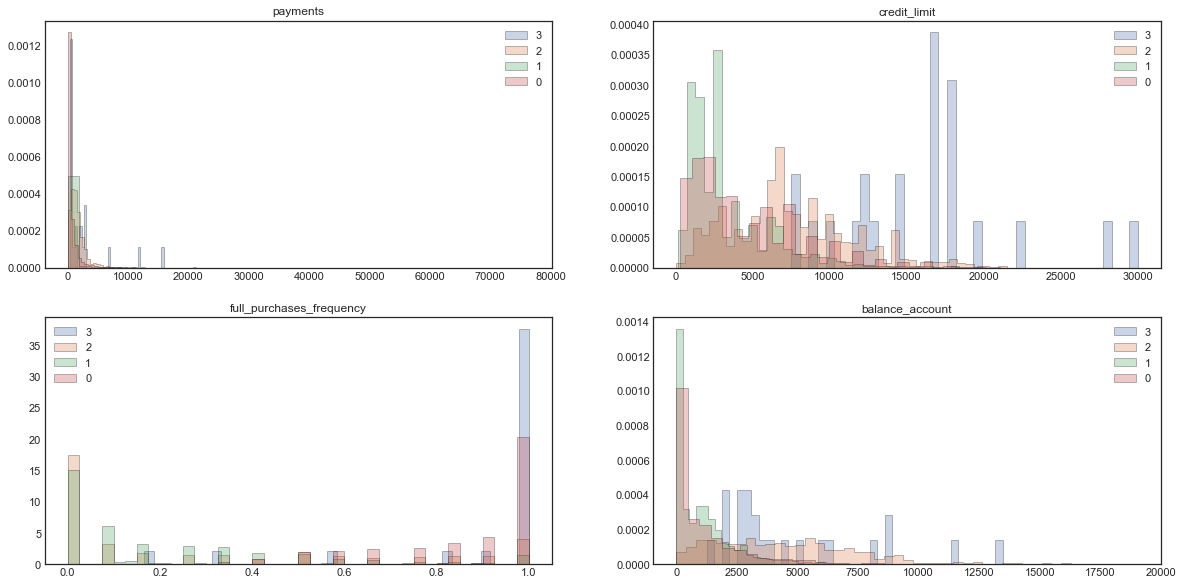

In [101]:
#f, (ax1, ax2, ax3, ax4) = plt.subplots(2, 2)
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

x1 = card_labelled["min_payments"][card_labelled["hc_cluster"]==3]
x2 = card_labelled["min_payments"][card_labelled["hc_cluster"]==2]
x3 = card_labelled["min_payments"][card_labelled["hc_cluster"]==1]
x4 = card_labelled["min_payments"][card_labelled["hc_cluster"]==0]

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40, ec="k")

ax1.hist(x1, **kwargs)
ax1.hist(x2, **kwargs)
ax1.hist(x3, **kwargs);
ax1.hist(x4, **kwargs);
labels= ["3","2", "1","0"]
ax1.legend(labels)
ax1.set_title("payments")

x1 = card_labelled["credit_limit"][card_labelled["hc_cluster"]==3]
x2 = card_labelled["credit_limit"][card_labelled["hc_cluster"]==2]
x3 = card_labelled["credit_limit"][card_labelled["hc_cluster"]==1]
x4 = card_labelled["credit_limit"][card_labelled["hc_cluster"]==0]
ax2.hist(x1, **kwargs)
ax2.hist(x2, **kwargs)
ax2.hist(x3, **kwargs);
ax2.hist(x4, **kwargs);
ax2.labels= ["3","2", "1","0"]
ax2.legend(labels)
ax2.set_title("credit_limit")

x1 = card_labelled["purchases_frequency"][card_labelled["hc_cluster"]==3]
x2 = card_labelled["purchases_frequency"][card_labelled["hc_cluster"]==2]
x3 = card_labelled["purchases_frequency"][card_labelled["hc_cluster"]==1]
x4 = card_labelled["purchases_frequency"][card_labelled["hc_cluster"]==0]
ax3.hist(x1, **kwargs)
ax3.hist(x2, **kwargs)
ax3.hist(x3, **kwargs);
ax3.hist(x4, **kwargs);
ax3.labels= ["3","2", "1","0"]
ax3.legend(labels)
ax3.set_title("full_purchases_frequency")

x1 = card_labelled["balance_account"][card_labelled["hc_cluster"]==3]
x2 = card_labelled["balance_account"][card_labelled["hc_cluster"]==2]
x3 = card_labelled["balance_account"][card_labelled["hc_cluster"]==1]
x4 = card_labelled["balance_account"][card_labelled["hc_cluster"]==0]
ax4.hist(x1, **kwargs)
ax4.hist(x2, **kwargs)
ax4.hist(x3, **kwargs);
ax4.hist(x4, **kwargs);
ax4.labels= ["3","2", "1","0"]
ax4.legend(labels)
ax4.set_title("balance_account")

plt.show()